# Using Linear Regression on a dataset regarding items sales

In [24]:
# import necessary libs 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# import data 
train_data = pd.read_csv(r"datasets/items/train.csv")
test_data = pd.read_csv(r"datasets/items/test.csv")

In [9]:
# getting insight of data (shape, column, index, etc)
print('Shape of training data :',train_data.shape)
print('Shape of testing data :',test_data.shape)
print(train_data.columns)
train_data.head()

Shape of training data : (1364, 36)
Shape of testing data : (341, 36)
Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Fat_Content_LF',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'O

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,6.800000,0.037490,48.6034,2004,291.6204,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,15.600000,0.172597,114.8518,1997,2163.1842,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,12.911575,0.054721,107.8254,1985,2387.5588,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,11.800000,0.098312,81.4618,1998,161.1236,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,17.850000,0.046600,125.1388,2004,1981.4208,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0


# Want insight on target : - Item_outlet_sales-

In [10]:
# Target variable is the "Item_Outlet_Sales" column >> Y
# Separate target from other column for both sets
train_y = train_data['Item_Outlet_Sales']
test_y = test_data['Item_Outlet_Sales']

# prepare variable sets
train_x = train_data.drop(columns=['Item_Outlet_Sales'],axis=1)
test_x = test_data.drop(columns=['Item_Outlet_Sales'],axis=1)

## base model, no parameters modified

In [11]:
#créer le modèle de régression linéaire
model = LinearRegression()

In [12]:
# ajuster le modèle aux training data
model.fit(train_x,train_y)

LinearRegression()

In [13]:
# model coefficient
print('\nCoefficient of model :', model.coef_)


Coefficient of model : [-3.84197604e+00  9.83065945e+00  1.61711856e+01  6.09197622e+01
 -8.64161561e+01  1.23593376e+02  2.34714039e+02 -2.44597425e+02
 -2.72938329e+01 -8.09611456e+00 -3.01147840e+02  1.70727611e+02
 -5.40194744e+01  7.34248834e+01  1.70313375e+00 -5.07701615e+01
  1.63553657e+02 -5.85286125e+01  1.04913492e+02 -6.01944874e+01
  1.98948206e+02 -1.40959023e+02  1.19426257e+02  2.66382669e+01
 -1.85619792e+02  1.43925357e+03  2.16134663e+02  3.54723990e+01
  3.54832996e+02 -5.54559635e+00 -3.49287400e+02 -1.39202954e+03
 -2.57982359e+02 -9.59016062e+02  2.60902796e+03]


In [14]:
# model intercept value (independent term in the linear model)
print('\nIntercept of model',model.intercept_)


Intercept of model -121926.9747329832


In [15]:
# predict on training
predict_train = model.predict(train_x)
#print('\nItem_Outlet_Sales on training data',predict_train) 

# Root Mean Squared Error du training dataset
rmse_train = mean_squared_error(train_y,predict_train)**(0.5)
print('\nRMSE on train dataset : ', rmse_train)


RMSE on train dataset :  1135.8159344155245


In [25]:
# predire sur les données de test
predict_test = model.predict(test_x)
#print('\nItem_Outlet_Sales on test data',predict_test) 

# Root Mean Squared Error du testing dataset
rmse_test = mean_squared_error(test_y,predict_test)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(test_y, predict_test))


RMSE on test dataset :  1009.2517232209674
Coefficient of determination: 0.56


# VISUALIZATION TEST on first two variable

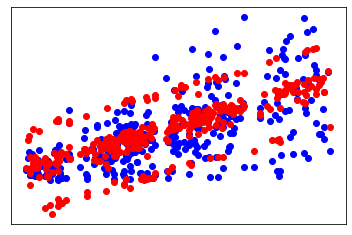

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# newmodel
model1 = LinearRegression()
model1.fit(train_x,train_y)
predict1_test = model1.predict(test_x)

# Plot outputs c=y,cmap=plt.cm.coolwarm
#plt.scatter(subset_test_x, test_y,  color='black')
plt.scatter(test_x['Item_MRP'],test_y, color='blue')
plt.scatter(test_x['Item_MRP'],predict1_test, color='red')

plt.xticks(())
plt.yticks(())

plt.show()

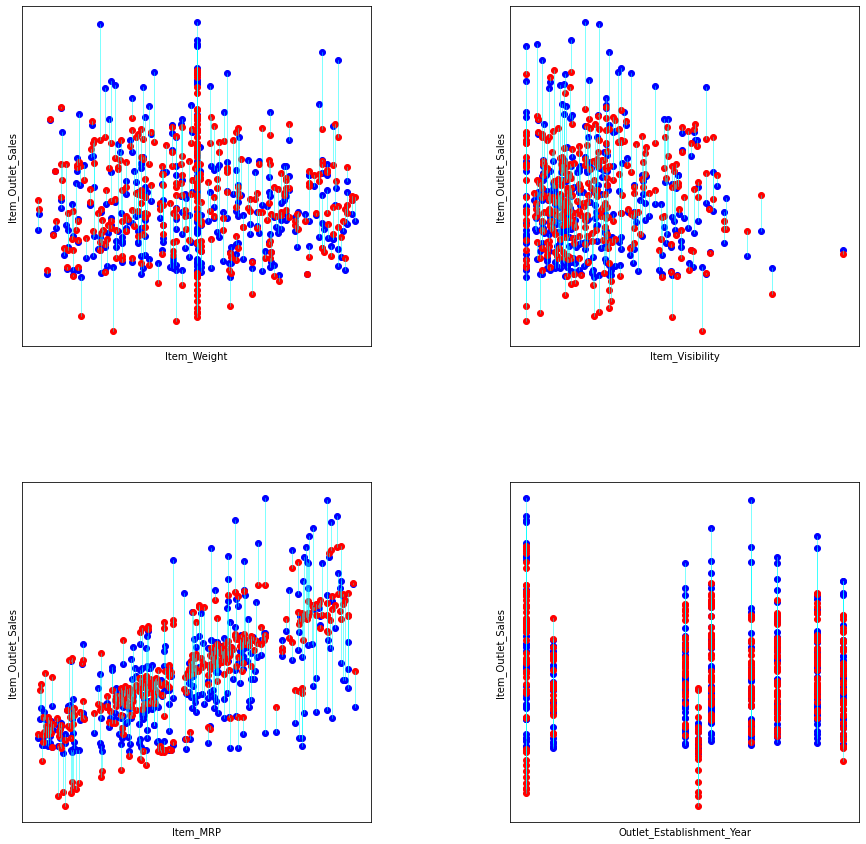

In [52]:
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2,figsize=(15,15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

columns = ["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year"]

for col,ax in zip(columns, sub.flatten()):
    ax.scatter(test_x[col],test_y, color='blue')
    ax.scatter(test_x[col],predict1_test, color='red')
    for x,y,yy in zip(test_x[col],test_y,predict1_test):
        ax.plot([x, x], [y, yy],color='cyan',linewidth=0.5)
    ax.set_xlabel(col)
    ax.set_ylabel('Item_Outlet_Sales')
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()